In [1]:
import pickle as pkl
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'

path = tf.keras.utils.get_file('mnist.npz', DATA_URL)
with np.load(path) as data:
  train_examples = data['x_train']
  train_labels = data['y_train']
  test_examples = data['x_test']
  test_labels = data['y_test']


In [14]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_examples)

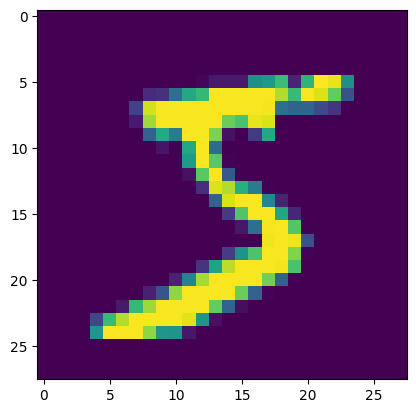

In [18]:
for i in train_dataset.take(1):
    plt.imshow(i)
    plt.show()

# Create list of numpy arrays

In [7]:
MASK_DIR_PATH = 'Semantic_Segmentation_Dataset/train/labels/'

In [9]:
# image_paths = [os.path.join(IMAGE_DIR_PATH, x) for x in os.listdir(IMAGE_DIR_PATH) if x.endswith('.png')]
mask_paths = [os.path.join(MASK_DIR_PATH, x) for x in os.listdir(MASK_DIR_PATH) if x.endswith('.npy')]

In [10]:
mask_arrays = [np.load(i) for i in mask_paths]

In [11]:
mask_arrays_np = np.asarray(mask_arrays)

In [20]:
mask_arrays_np.size * mask_arrays_np.itemsize / 10**9

2.282496

In [19]:
mask_ds = tf.data.Dataset.from_tensor_slices(mask_arrays_np)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [19]:
tf.config.experimental.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [14]:
details = tf.config.experimental.get_device_details(tf.config.list_physical_devices('GPU')[0])

In [17]:
details.get('compute_capability')

In [5]:
from torch import dml as td 

In [ ]:
td.dd

In [3]:
device = torch.device('dml:0')

In [4]:
device = torch.device('dml:0')
tensor1 = torch.tensor([1,2,3,4,5,6]).to(device)
tensor2 = torch.tensor([1,2,3,4,5,6]).to(device)
model.to(device)

NameError: name 'model' is not defined

In [17]:
model = torch.load('best_model.pkl', map_location=torch.device(device))

RuntimeError: don't know how to restore data location of torch.FloatStorage (tagged with dml:0)

In [2]:
tensor1 = torch.tensor([1]).to("dml")
tensor2 = torch.tensor([2]).to("dml")

In [3]:
dml_algebra = tensor1 + tensor2
dml_algebra.item()

3

In [8]:
os.getcwd()

'C:\\Users\\Ash\\Documents\\GitHub\\RITnet'

In [9]:
os.listdir('Semantic_Segmentation_Dataset/train/images/')[0]

'000000002610.png'

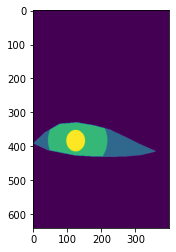

In [19]:
mask = np.load('Semantic_Segmentation_Dataset/train/labels/000000002610.npy')
image = plt.imread('Semantic_Segmentation_Dataset/train/images/000000002610.png')
plt.imshow(mask)

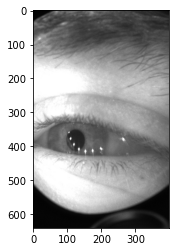

In [20]:
plt.imshow(image)

RuntimeError: Expected one of cpu, cuda, xpu, mkldnn, opengl, opencl, ideep, hip, msnpu, xla, vulkan device type at start of device string: gpu

In [6]:
model

OrderedDict([('down_block1.conv1.weight',
              tensor([[[[-3.3433e-01, -1.2248e-01, -5.0289e-01],
                        [-6.5299e-03, -9.5857e-02, -1.6030e-01],
                        [ 4.4167e-01,  6.5095e-01,  7.9194e-02]]],
              
              
                      [[[ 1.5730e-02,  4.8703e-02, -9.4205e-02],
                        [ 3.5834e-02, -6.0256e-01,  5.9420e-01],
                        [-5.6345e-02,  1.4554e-01,  9.5615e-02]]],
              
              
                      [[[ 3.4039e-02, -1.0532e-01, -4.8287e-02],
                        [-6.4555e-02,  2.1196e-01, -1.8218e-01],
                        [-5.2262e-02, -5.5402e-02,  3.0607e-02]]],
              
              
                      [[[ 1.5974e-01,  6.3784e-01, -4.5462e-01],
                        [ 1.7152e-01, -1.2724e-01, -1.6073e-01],
                        [-1.0454e-01,  4.8983e-02,  9.9358e-02]]],
              
              
                      [[[-2.5880e-01, -9.4630e-02,